In [9]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import copy as copy
#

import matplotlib as mpl
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# modified from Brandon Reichl notebook


In [10]:
#Hdir = ('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20230608/CM4_historical_c192_OM4p125/gfdl.ncrc5-intel22-prod-openmp/pp/ocean_annual/ts/annual/5yr/')
files=[]
files+=['ocean_annual.2010-2014.thkcello.nc']
#
FH = xr.open_mfdataset(files,chunks={'time':1})

# static file 
fname_static = "../../common/CM4X_p125/ocean_annual.static.nc"
#fname_static = "/net/smg/OWG/CM4_highres/grids/p125/ocean_annual.static.nc"
static       = xr.open_mfdataset(fname_static)

/var/folders/87/1v45zl3158n2h7x91wdx03wm0000gn/T/ipykernel_21471/4224939442.py:5: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  FH = xr.open_mfdataset(files,chunks={'time':1})


In [11]:
#This specifies a slice along a longitude
#NOTE the transect is not actually on this longitude, but whatever longitude is labeled
# w/ xh=LON in the file.  It is usually pretty close.
LON = -40
LAT= [-76,-55]

#This specifies a slice along a latitude
#NOTE the transect is not actually on this latitude, but whatever latitude is labeled
# w/ yh=LON in the file.  It is usually pretty close.
# LON = [-220,-80]
# LAT= 0

if np.size(LAT)>1:
    XXh = static.geolat.sel(xh=LON,method='nearest').sel(yh=slice(LAT[0],LAT[1])).values
    XXq = static.geolat_v.sel(xh=LON,method='nearest').sel(yq=slice(LAT[0],LAT[1])).values
    DPT = FH.thkcello.sel(xh=LON,method='nearest').sel(yh=slice(LAT[0],LAT[1])).mean(dim='time').cumsum(dim='zl').values
    DPT = np.vstack((np.zeros(XXh.size),DPT))
    LIM=LAT
else:
    XXh = static.geolon.sel(yh=LAT,method='nearest').sel(xh=slice(LON[0],LON[1])).values
    XXq = static.geolon_u.sel(yh=LAT,method='nearest').sel(xq=slice(LON[0],LON[1])).values
    DPT = FH.thkcello.sel(yh=LAT,method='nearest').sel(yh=slice(LON[0],LON[1])).mean(dim='time').cumsum(dim='zl').values
    DPT = np.vstack((np.zeros(XXh.size),DPT))
    LIM=LON

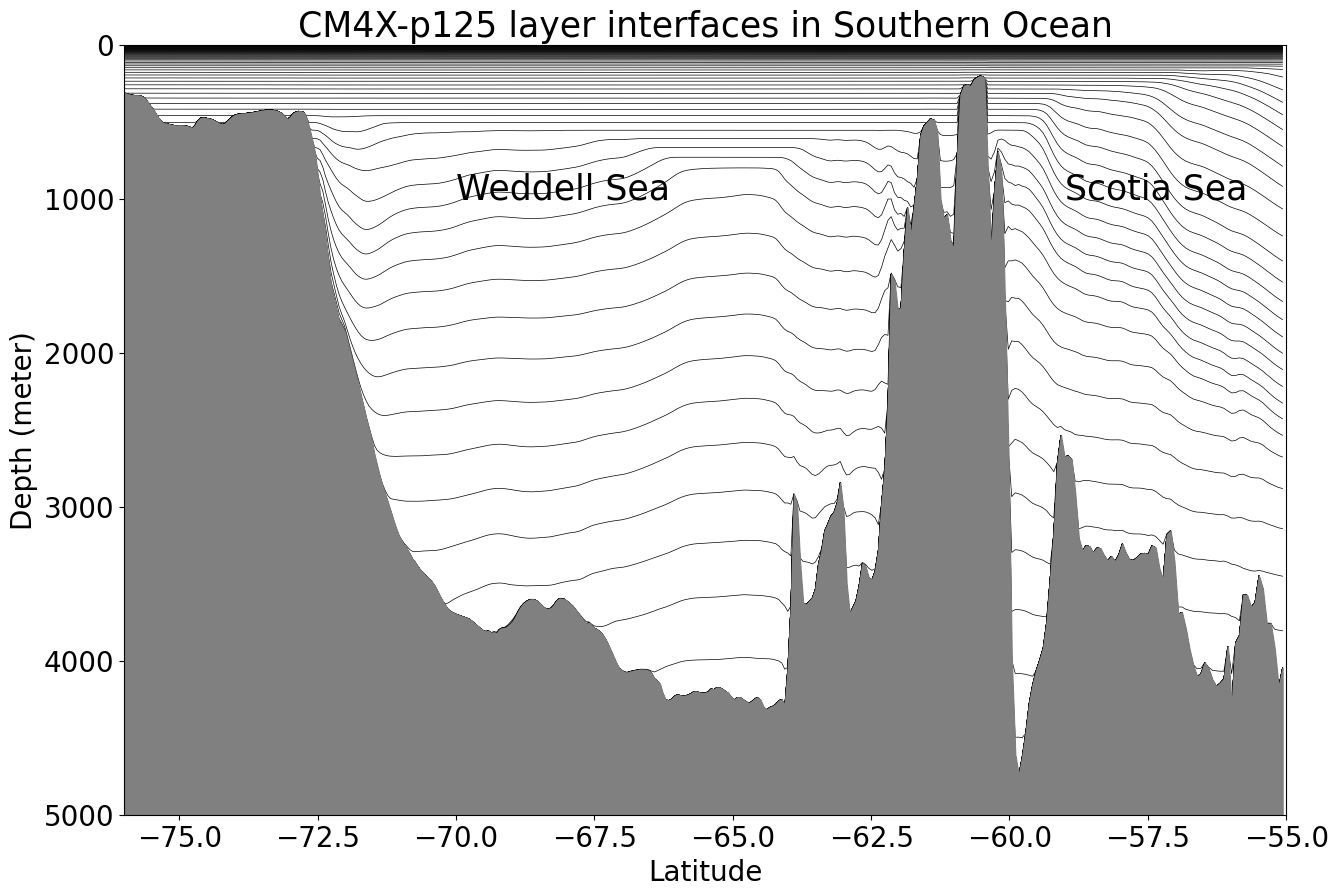

In [12]:
fig,AX1=plt.subplots(1,1,figsize=(15,10))


CL='rg'
TI=2

II=-1
for X in[FH,]:
    II+=1
    
    for dpt in DPT:
        AX1.plot(XXh,dpt,'-',color='k',linewidth=0.5,zorder=1)
    AX1.fill_between(XXh,DPT[-1],y2=5000,color='gray')    
    AX1.set_ylim(5000,0)
    AX1.set_xlim(LIM)
    AX1.set_title('CM4X-p125 layer interfaces in Southern Ocean', fontsize=25)
    AX1.set_xlabel('Latitude',fontsize=20)
    AX1.set_ylabel('Depth (meter)',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    AX1.text(-70,1000, 'Weddell Sea', fontsize=25)
    AX1.text(-59,1000, 'Scotia Sea', fontsize=25)
    
    fig.savefig('FigA3_CM4p125_cell_interfaces.png', bbox_inches='tight', dpi=400) 

